<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [26]:
import pandas as  pd
import geopandas as gpd
import matplotlib.pyplot as plt
from datetime import datetime
from matplotlib.ticker import PercentFormatter
import numpy as np
import math

In [2]:
allCrash=pd.read_csv('CDS_all.csv', )

C:\Users\Meredith.Raymer\Anaconda3\envs\geo-env\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
allCrash.head()

,OBJECTID,INCID_NO,CASE_NUM,PARK_ALPHA,Region,# Crash,STATE_CODE,CRASH_DATE,CRASH_TIME,RTE_NO,...,LATITUDE,LONGITUDE,MILEPOST,IMPORT_DATE,FILE_NAME,SAVE_DATE,ROUTE_IDENT,RIP_CYCLE,MP_NODE,SPTL_LOC
0,6,ABLI140610163500,14054379,ABLI,SER,1,KY,"Tuesday, June 10, 2014",1635.0,NaN,...,38.91205,-76.93412,0.0,NaN,NaN,00:00.0,NaN,NaN,NaN,0
1,5,ABLI121009110000,12474,ABLI,SER,1,KY,"Tuesday, October 9, 2012",1100.0,101,...,NaN,NaN,NaN,NaN,NaN,00:00.0,NaN,NaN,NaN,0
2,4,ABLI091117170900,N08113,ABLI,SER,1,NY,"Tuesday, November 17, 2009",1709.0,NaN,...,NaN,NaN,NaN,NaN,NaN,00:00.0,NaN,NaN,NaN,0
3,3,ABLI070804175500,5540070013,ABLI,SER,1,KY,"Saturday, August 4, 2007",1755.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,2,ABLI070425075000,5540070001,ABLI,SER,1,KY,"Wednesday, April 25, 2007",750.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [4]:
numNoneTypebyRow=allCrash.isnull().sum(axis=1).tolist()
numNoneTypebyColumn=allCrash.isnull().sum(axis=0).tolist()
x=len(numNoneTypebyRow)
y=len(numNoneTypebyColumn)
fullRow=0
fullCol=0
for element in numNoneTypebyRow:
    if element==0:
        fullRow=fullRow+1
for element in numNoneTypebyColumn:
    if element==0:
        fullCol=fullCol+1
print('Total Number of Rows', x)
print('Number of Full Rows',fullRow)
print('Total Number of Columns', y)
print('Number of Full Columns',fullCol)

Total Number of Rows 83926
Number of Full Rows 0
Total Number of Columns 58
Number of Full Columns 3


In [20]:
percentIncomplete=[]
for element in numNoneTypebyRow:
    percentIncomplete.append(element/58)

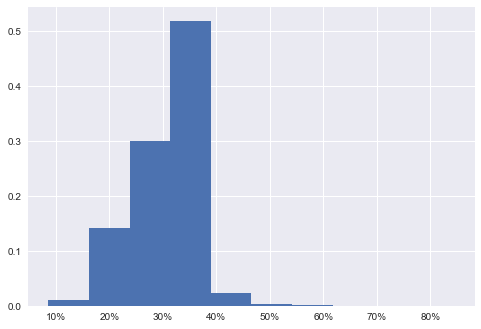

In [21]:
plt.hist(percentIncomplete, weights=np.ones(len(percentIncomplete)) / len(percentIncomplete))
plt.gca().xaxis.set_major_formatter(PercentFormatter(1))
plt.show()

In [7]:
allCrash['CRASH_DATE']=pd.to_datetime(allCrash['CRASH_DATE'])

In [8]:
allCrash['day_of_week'] = allCrash['CRASH_DATE'].dt.day_name()

In [9]:
allCrash.head()

,OBJECTID,INCID_NO,CASE_NUM,PARK_ALPHA,Region,# Crash,STATE_CODE,CRASH_DATE,CRASH_TIME,RTE_NO,...,LONGITUDE,MILEPOST,IMPORT_DATE,FILE_NAME,SAVE_DATE,ROUTE_IDENT,RIP_CYCLE,MP_NODE,SPTL_LOC,day_of_week
0,6,ABLI140610163500,14054379,ABLI,SER,1,KY,2014-06-10,1635.0,NaN,...,-76.93412,0.0,NaN,NaN,00:00.0,NaN,NaN,NaN,0,Tuesday
1,5,ABLI121009110000,12474,ABLI,SER,1,KY,2012-10-09,1100.0,101,...,NaN,NaN,NaN,NaN,00:00.0,NaN,NaN,NaN,0,Tuesday
2,4,ABLI091117170900,N08113,ABLI,SER,1,NY,2009-11-17,1709.0,NaN,...,NaN,NaN,NaN,NaN,00:00.0,NaN,NaN,NaN,0,Tuesday
3,3,ABLI070804175500,5540070013,ABLI,SER,1,KY,2007-08-04,1755.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,Saturday
4,2,ABLI070425075000,5540070001,ABLI,SER,1,KY,2007-04-25,750.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,Wednesday


In [10]:
def label_timePeriods(row):
    if row['CRASH_TIME']>500 and row['CRASH_TIME']<=1200:
        return('Morning')
    elif row['CRASH_TIME']>1200 and row['CRASH_TIME']<=1700:
        return('Afternoon')
    elif row['CRASH_TIME']>1700 and row['CRASH_TIME']<=2100:
        return('Evening')
    else:
        return('Night')

In [11]:
allCrash['time_of_day']=allCrash.apply(lambda row:label_timePeriods(row), axis=1)
allCrash.head()

,OBJECTID,INCID_NO,CASE_NUM,PARK_ALPHA,Region,# Crash,STATE_CODE,CRASH_DATE,CRASH_TIME,RTE_NO,...,MILEPOST,IMPORT_DATE,FILE_NAME,SAVE_DATE,ROUTE_IDENT,RIP_CYCLE,MP_NODE,SPTL_LOC,day_of_week,time_of_day
0,6,ABLI140610163500,14054379,ABLI,SER,1,KY,2014-06-10,1635.0,NaN,...,0.0,NaN,NaN,00:00.0,NaN,NaN,NaN,0,Tuesday,Afternoon
1,5,ABLI121009110000,12474,ABLI,SER,1,KY,2012-10-09,1100.0,101,...,NaN,NaN,NaN,00:00.0,NaN,NaN,NaN,0,Tuesday,Morning
2,4,ABLI091117170900,N08113,ABLI,SER,1,NY,2009-11-17,1709.0,NaN,...,NaN,NaN,NaN,00:00.0,NaN,NaN,NaN,0,Tuesday,Evening
3,3,ABLI070804175500,5540070013,ABLI,SER,1,KY,2007-08-04,1755.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,Saturday,Evening
4,2,ABLI070425075000,5540070001,ABLI,SER,1,KY,2007-04-25,750.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,Wednesday,Morning


In [27]:
allCrash['hour']=(allCrash['CRASH_TIME']/100)
allCrash.head()



TypeError: cannot convert the series to <class 'float'>

In [12]:
df_day_grouped=allCrash.groupby(['day_of_week']).count()
df_day_grouped=df_day_grouped.reset_index()
df_day_grouped=df_day_grouped[['day_of_week','# Crash']].sort_values(by='day_of_week')
df_day_grouped.rename(columns={'# Crash': 'number_of_crashes'}, inplace=True)
df_day_grouped

,day_of_week,number_of_crashes
0,Friday,13424
1,Monday,11046
2,Saturday,12729
3,Sunday,11062
4,Thursday,12206
5,Tuesday,11526
6,Wednesday,11932


In [13]:
df_day_grouped=df_day_grouped.reindex([1,5,6,4,0,2,3])
df_day_grouped

,day_of_week,number_of_crashes
1,Monday,11046
5,Tuesday,11526
6,Wednesday,11932
4,Thursday,12206
0,Friday,13424
2,Saturday,12729
3,Sunday,11062


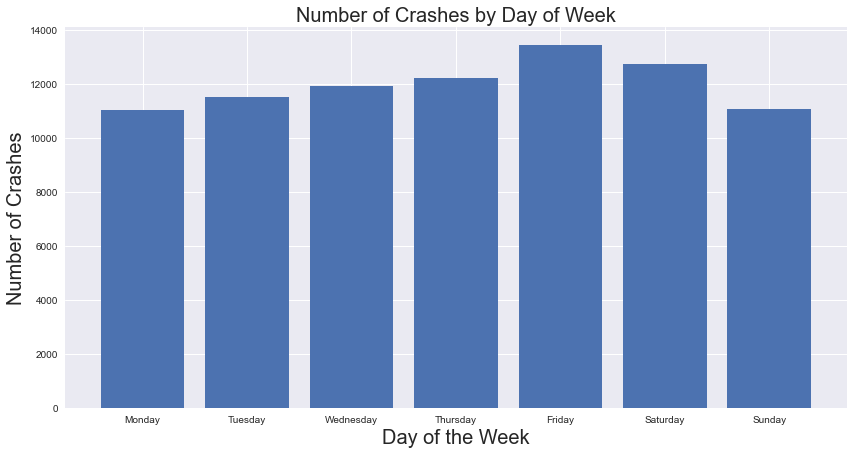

In [14]:
plt.style.use('seaborn')

tick_spacing = 3 
fig,ax = plt.subplots(1,1, figsize=(14, 7))
ax.bar(df_day_grouped.day_of_week, df_day_grouped.number_of_crashes, linewidth=4)
ax.set_title('Number of Crashes by Day of Week', fontsize=20)

ax.set_xlabel('Day of the Week', fontsize=20)
ax.set_ylabel('Number of Crashes', fontsize=20)
ax.grid('off')

plt.show()

In [15]:
df_time_grouped=allCrash.groupby(['time_of_day']).count()
df_time_grouped=df_time_grouped.reset_index()
df_time_grouped=df_time_grouped[['time_of_day','# Crash']].sort_values(by='time_of_day')
df_time_grouped.rename(columns={'# Crash': 'number_of_crashes'}, inplace=True)
df_time_grouped

,time_of_day,number_of_crashes
0,Afternoon,28453
1,Evening,17437
2,Morning,25124
3,Night,12912


In [16]:
df_time_grouped=df_time_grouped.reindex([2,0,1,3])
df_time_grouped

,time_of_day,number_of_crashes
2,Morning,25124
0,Afternoon,28453
1,Evening,17437
3,Night,12912


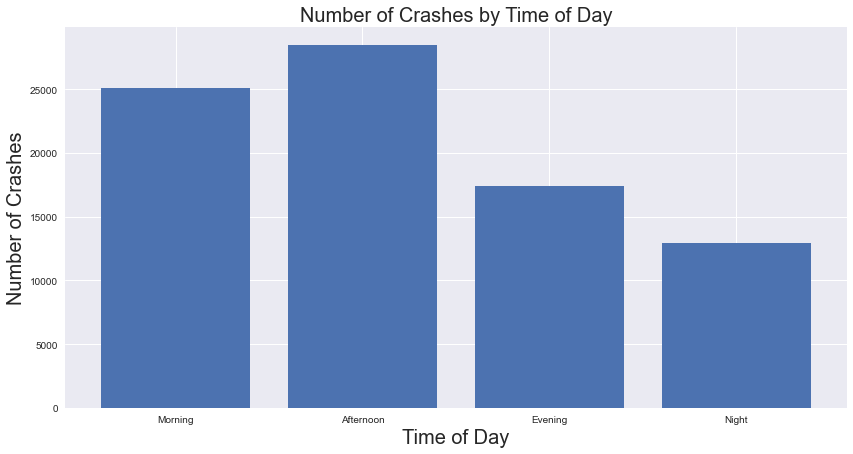

In [17]:
plt.style.use('seaborn')

tick_spacing = 3 
fig,ax = plt.subplots(1,1, figsize=(14, 7))
ax.bar(df_time_grouped.time_of_day, df_time_grouped.number_of_crashes, linewidth=4)
ax.set_title('Number of Crashes by Time of Day', fontsize=20)

ax.set_xlabel('Time of Day', fontsize=20)
ax.set_ylabel('Number of Crashes', fontsize=20)
ax.grid('off')

plt.show()

In [18]:
df_type_grouped=allCrash.groupby(['CATEGORY']).count()
df_type_grouped=df_type_grouped.reset_index()
df_type_grouped=df_type_grouped[['CATEGORY','# Crash']].sort_values(by='CATEGORY')
df_type_grouped.rename(columns={'# Crash': 'number_of_crashes'}, inplace=True)
df_type_grouped

,CATEGORY,number_of_crashes
0,FATAL,322
1,INJURY,12276
2,PD ONLY,70754


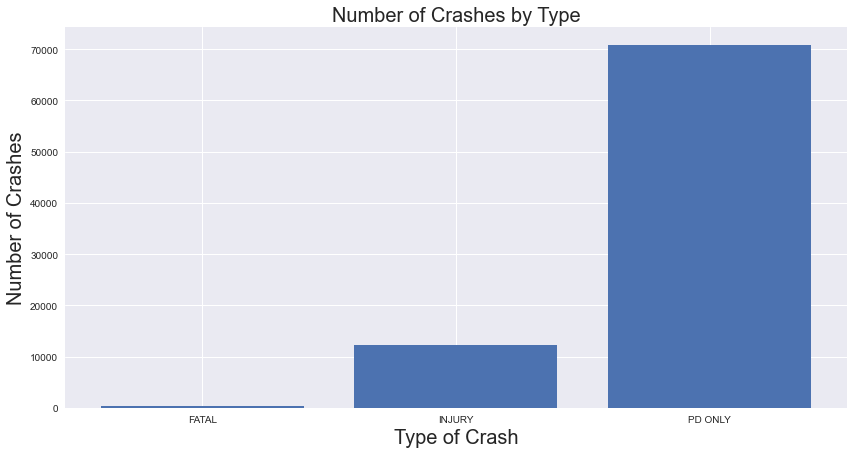

In [19]:
plt.style.use('seaborn')

tick_spacing = 3 
fig,ax = plt.subplots(1,1, figsize=(14, 7))
ax.bar(df_type_grouped.CATEGORY, df_type_grouped.number_of_crashes, linewidth=4)
ax.set_title('Number of Crashes by Type', fontsize=20)

ax.set_xlabel('Type of Crash', fontsize=20)
ax.set_ylabel('Number of Crashes', fontsize=20)
ax.grid('off')

plt.show()